In [1]:
# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import psycopg2 as pg

In [2]:
engine = pg.connect("dbname='postgres' user='postgres' host='database-final.cjdbapst3wjf.us-east-1.rds.amazonaws.com' port='5432' password='FinalProject05'")
Contributions = pd.read_sql('select * from merged_2021', con=engine)
Contributions.head()
Contributions.dropna()

,election,candidateid,candidatename,date,contributiontype,city,state,zipcode,amount,matchamt,prevamt,totalamount,expenditure_amount,purposecode,purpose
0,2021,2546,"Andrew,Yang",2021-06-04,Corporation,Glendale,NY,11385,0.0,0.0,0.0,0.0,91,Other,Other: explntion
1,2021,148,"Scott,Stringer",2021-05-01,Limited Liability Company,New York,NY,10006,0.0,0.0,0.0,0.0,3240,Office Rent,Office Rent
2,2021,148,"Scott,Stringer",2021-05-04,Limited Liability Company,New York,NY,10006,0.0,0.0,0.0,0.0,13240,Office Rent,Office Rent
3,2021,148,"Scott,Stringer",2021-06-07,Limited Liability Company,New York,NY,10006,0.0,0.0,0.0,0.0,16762,Office Rent,Office Rent
4,2021,2393,"Maya,Wiley",2021-04-01,Political Action Committee,New York,NY,10036,0.0,0.0,0.0,0.0,1500,Fundraising,Fundraising
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,2021,2550,"Stacey,Prussman",2021-04-06,Corporation,San Jose,CA,95111,0.0,0.0,0.0,0.0,56,Office Expenses,Office Expenses
10881,2021,2550,"Stacey,Prussman",2021-05-06,Corporation,San Jose,CA,95111,0.0,0.0,0.0,0.0,56,Office Expenses,Office Expenses
10882,2021,2550,"Stacey,Prussman",2021-06-07,Corporation,San Jose,CA,95111,0.0,0.0,0.0,0.0,56,Office Expenses,Office Expenses
10883,2021,2550,"Stacey,Prussman",2021-07-06,Corporation,San Jose,CA,95111,0.0,0.0,0.0,0.0,56,Petition Expenses,Petition Expns.


In [3]:
Contributions_df = Contributions.drop(columns=['election','prevamt'])
total_groupby = Contributions_df.groupby(['candidatename']).sum(['totalamount']).sort_values('totalamount',ascending=False)
total_groupby

,zipcode,amount,matchamt,totalamount,expenditure_amount
candidatename,,,,,
"Adams, Eric L",1341454974,6418026.98,1371278.00,8.859206e+06,0
"Yang, Andrew",1274977384,3886188.36,977179.00,6.874472e+06,0
"Wiley, Maya D",839389872,2027095.85,773392.92,5.173257e+06,0
"Stringer, Scott M",155314370,2249758.01,844952.00,4.213585e+06,0
"Garcia, Kathryn A",179251729,2015745.10,894456.00,4.006340e+06,0
...,...,...,...,...,...
"Eric,Adams",27981663,0.00,0.00,0.000000e+00,11511838
"Paperboy,Prince",963819,0.00,0.00,0.000000e+00,3127
"Peter,Guimaraes",373377,0.00,0.00,0.000000e+00,13687


In [4]:
Contributions_df = Contributions_df.groupby(['zipcode','date','contributiontype','city','state']).sum('totalamount')

In [5]:
Contributions_df.head()

amount  matchamt  \
zipcode date       contributiontype city             state                     
0       2018-02-05 Other            Brooklyn         NY        0.0       0.0   
        2018-02-22 Other            New York         NY        0.0       0.0   
        2018-12-10 Individual       Brooklyn         NY     2000.0     250.0   
        2019-01-10 Individual       New York         NY      200.0     175.0   
        2019-01-31 Individual       Long Island City NY        0.0       0.0   

                                                            totalamount  \
zipcode date       contributiontype city             state                
0       2018-02-05 Other            Brooklyn         NY             0.0   
        2018-02-22 Other            New York         NY             0.0   
        2018-12-10 Individual       Brooklyn         NY          2250.0   
        2019-01-10 Individual       New York         NY           375.0   
        2019-01-31 Individual       Long Island City NY             0.0   

                                                            expenditure_amount  
zipcode date       contributiontype city             state                      
0       2018-02-05 Other            Brooklyn         NY                    115  
        2018-02-22 Other            New York         NY                     51  
        2018-12-10 Individual       Brooklyn         NY                      0  
        2019-01-10 Individual       New York         NY                      0  
        2019-01-31 Individual       Long Island City NY                      0

In [6]:
Contributions_df = Contributions_df.reset_index()
Contributions_df

,zipcode,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,0,2018-02-05,Other,Brooklyn,NY,0.0,0.0,0.0,115
1,0,2018-02-22,Other,New York,NY,0.0,0.0,0.0,51
2,0,2018-12-10,Individual,Brooklyn,NY,2000.0,250.0,2250.0,0
3,0,2019-01-10,Individual,New York,NY,200.0,175.0,375.0,0
4,0,2019-01-31,Individual,Long Island City,NY,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
97439,104514768,2021-05-09,Individual,BRONX,NY,100.0,100.0,220.0,0
97440,106052020,2021-07-20,Individual,White Plains,NY,10.0,0.0,10.0,0
97441,114111604,2020-07-29,Individual,CAMBRIA HEIGHTS,NY,75.0,75.0,150.0,0
97442,114111604,2021-02-13,Individual,CAMBRIA HEIGHTS,NY,25.0,25.0,50.0,0


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
Contributions_df_enc = Contributions_df.copy()
le = LabelEncoder()
Contributions_df_enc['date'] = le.fit_transform(Contributions_df['date'])
Contributions_df_enc['contributiontype'] = le.fit_transform(Contributions_df['contributiontype'])
Contributions_df_enc['city'] = le.fit_transform(Contributions_df['city'])
# Contributions_df_enc['Amount'] = le.fit_transform(Contributions_df['Amount'])
Contributions_df_enc['state'] = le.fit_transform(Contributions_df['state'])
Contributions_df_enc['zipcode'] = le.fit_transform(Contributions_df['zipcode'])
# Contributions_df_enc['MatchAmt'] = le.fit_transform(Contributions_df['MatchAmt'])
# Contributions_df_enc[features] = scaler.fit_transform(Contributions_df_enc[features])
Contributions_df_enc.head()

,zipcode,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,0,18,7,631,36,0.0,0.0,0.0,115
1,0,27,7,3758,36,0.0,0.0,0.0,51
2,0,298,4,631,36,2000.0,250.0,2250.0,0
3,0,327,4,3758,36,200.0,175.0,375.0,0
4,0,344,4,3004,36,0.0,0.0,0.0,0


In [8]:
X = Contributions_df_enc.drop('totalamount',axis = 1)
y = Contributions_df_enc['totalamount']
Contributions_df_enc.nunique()

zipcode               8558
date                  1267
contributiontype        10
city                  6837
state                   55
amount                3417
matchamt              1317
totalamount           5940
expenditure_amount    2142
dtype: int64

In [9]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=79)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [11]:
regr = RandomForestRegressor()

In [12]:
regr.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
y_pred = regr.predict(X_test)
print(len(y_pred))

29234


In [14]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

0.8815132300380863


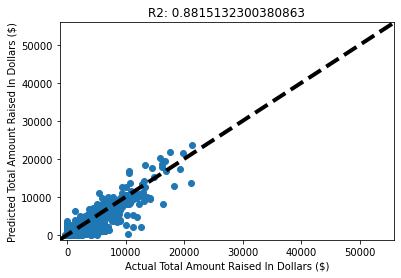

In [15]:
# %matplotlib inline
print(r_squared)
# fig, ax = plt.subplots()
# ax.scatter(y_test,y_pred)
# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Actual Total Amount Raised In Dollars ($)')
# ax.set_ylabel('Predicted Total Amount Raised In Dollars ($)')
# ax.set_title('R2: ' + str(r2_score(y_test, y_pred)))
plt.scatter(y_test,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Total Amount Raised In Dollars ($)')
plt.ylabel('Predicted Total Amount Raised In Dollars ($)')
plt.title('R2: ' + str(r2_score(y_test, y_pred)))
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.savefig('../Resources/Predicted_Total_Amount_Regression_2005.png')

In [16]:
pred_df = X_test
pred_df['Predicted Total Amount'] = y_pred
# pred_df.groupby('ZipCode').sum('Predicted Total Amount').head()

/Users/Abir/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
pred_df.isnull().sum()

zipcode                   0
date                      0
contributiontype          0
city                      0
state                     0
amount                    0
matchamt                  0
expenditure_amount        0
Predicted Total Amount    0
dtype: int64

In [18]:
pred_graph = pred_df.groupby('zipcode').sum('redicted Total Amount').sort_values(by=['Predicted Total Amount'],ascending=True)

In [19]:
# pred_graph = pred_graph.reset_index()
pred_graph

,date,contributiontype,city,state,amount,matchamt,expenditure_amount,Predicted Total Amount
zipcode,,,,,,,,
1541,1100,3,631,36,0.00,0.0,19,0.000000
7023,1165,4,2865,35,0.00,0.0,1625,0.000000
7003,1254,7,2865,35,0.00,0.0,799,0.000000
853,1171,3,2307,33,0.00,0.0,300,0.000000
854,2629,18,7005,99,0.00,0.0,9000,0.000000
...,...,...,...,...,...,...,...,...
1500,206306,862,212217,7922,146562.42,61232.0,845418,274400.633002
1514,195660,814,193716,7265,129642.13,70058.0,90450,277639.701202
1195,206343,935,895884,8378,127359.84,68246.0,221869,296276.347389
